In [1]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs1 import *

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#cohort = 'basel'
cohort = 'eddy'
ss = 10

In [3]:
if cohort == 'eddy':

    analysisProteins = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS']

    pretty_printing = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
           'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
           'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
           'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
           'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS', 'size']
else:
    analysisProteins = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'Carbonic_Anhydrase_IX',
       'Cytokeratin19', 'Cytokeratin5', 'Cytokeratin7', 'Cytokeratin8/18',
       'DNA1', 'DNA2', 'EGFR', 'Ecadherin', 'EpCAM', 'Erk1/2', 'Fibronectin',
       'GATA3', 'H3K27me3', 'Keratin14', 'Ki67', 'Progesterone_Receptor_A/B',
       'RabbitIgGHL', 'S6', 'SMA', 'Slug', 'Sox9', 'TotalHH3', 'Twist', 
       'Vimentin', 'bCatenin', 'cMyc', 'cerbB2_Her2', 'cleavedPARP_CleavedCaspase3',
       'mTOR', 'p53', 'panCytokeratin/Keratin_Epithelial', 'phospho_HH3', 'vWF_CD31']

    pretty_printing = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'CAIX', 
                    'CK19', 'CK5', 'CK7', 'CK8/18', 
                    'DNA1', 'DNA2', 'EGFR', 'ECadherin', 'EpCAM', 'Erk', 'Fibronectin', 
                    'GATA3', 'H3K27me3', 'CK14', 'Ki67', 'PR', 
                    'Estroge', 'S6', 'SMA', 'Slug', 'Sox9', 'TotHH3', 'Twist',
                    'Vimentin', 'bCatenin', 'cMyc', 'Her2', 'cleavedPARP', 
                    'mTOR', 'p53', 'panCK', 'phosHH3', 'vWF', 'size'] 

#tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
#te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))
te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}_exp.h5ad'.format(cohort, cohort))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [4]:
trY, trS, _, _, _ = prepData(tr_exp, 2, analysisProteins)

In [5]:
mat = pd.DataFrame(trY, columns = pretty_printing[:-1])

In [6]:
np.arcsinh(trY)

tensor([[1.7363, 1.5297, 1.3008,  ..., 2.1763, 0.5255, 0.0998],
        [2.9441, 2.0947, 1.7413,  ..., 2.0658, 0.3460, 0.1756],
        [1.0605, 1.9069, 1.5502,  ..., 2.8439, 0.2475, 0.3076],
        ...,
        [0.2288, 1.3354, 1.1290,  ..., 2.5996, 0.6464, 0.5153],
        [1.2558, 2.1481, 1.1676,  ..., 2.7563, 0.4079, 0.3780],
        [1.2490, 2.3333, 0.8259,  ..., 2.8728, 0.4881, 0.2735]])

In [7]:
thresholds = pd.DataFrame(np.quantile(trY, [0.25, 0.75], axis=0), columns = pretty_printing[:-1])

In [8]:
'''
x = np.array(mat['CD45']); y = np.array(mat['CD4'])

## case 1: bottom right
bot_right = sum((x > thresholds['CD45'][1]) & (y < thresholds['CD4'][0]))

## case 2: top left
top_left = sum((x < thresholds['CD45'][0]) & (y > thresholds['CD4'][1]))

## case 3: bottom left
bot_left = sum((x < thresholds['CD45'][0]) & (y < thresholds['CD4'][0]))

## case 4: top left
top_right = sum((x > thresholds['CD45'][1]) & (y > thresholds['CD4'][1]))

## negative case:
neg_score = (bot_right + top_left)/len(x)

## postive case:
pos_score = (bot_left + top_right)/len(x)
'''

"\nx = np.array(mat['CD45']); y = np.array(mat['CD4'])\n\n## case 1: bottom right\nbot_right = sum((x > thresholds['CD45'][1]) & (y < thresholds['CD4'][0]))\n\n## case 2: top left\ntop_left = sum((x < thresholds['CD45'][0]) & (y > thresholds['CD4'][1]))\n\n## case 3: bottom left\nbot_left = sum((x < thresholds['CD45'][0]) & (y < thresholds['CD4'][0]))\n\n## case 4: top left\ntop_right = sum((x > thresholds['CD45'][1]) & (y > thresholds['CD4'][1]))\n\n## negative case:\nneg_score = (bot_right + top_left)/len(x)\n\n## postive case:\npos_score = (bot_left + top_right)/len(x)\n"

In [9]:
if cohort == 'eddy':
    pairs = [
        ['CD45','CD4'],
        ['CD45','CD8'],
        ['CD45','CD11b'],
        ['CD45','CD19'],
        ['CD45','CD28'],
        ['CD45','CD68'],
        ['CD4','CD8'],
        ['CD4','CD28'],
        ['CD8','CD28'],
    
        ['Stroma','CD31'],
        ['Stroma','Epithelium'],
    
        ['Epithelium','CD4'],
        ['Epithelium','CD8'],
        ['Epithelium','CD11b'],
        ['Epithelium','CD31'],
        ['Epithelium','CD19'],
        ['Epithelium','CD45']]
else:
    pairs = [['CD3','CD20'],
        ['CD3','CD68'],
        ['Vimentin','ECadherin'],
        ['Vimentin','Fibronectin'],
        ['EpCAM','ECadherin'],
        ['EpCAM','panCK'],
        ['ECadherin','CD68']]

CD45_CD4 -- neg: 0.09815270341966913; pos: 0.1502918053344909


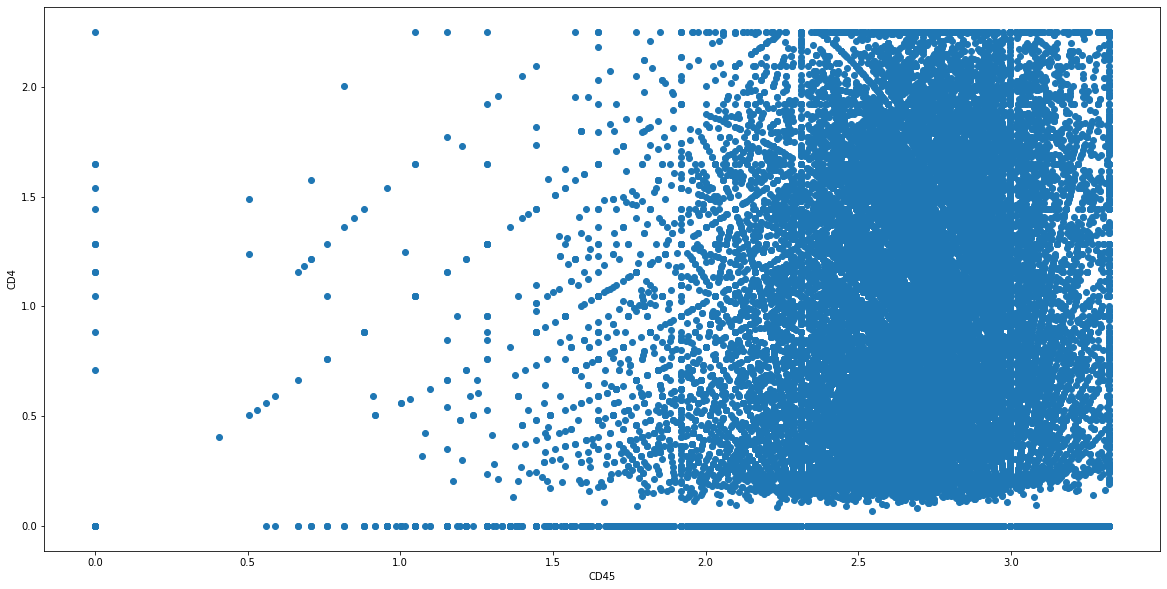

CD45_CD8 -- neg: 0.06670525249602084; pos: 0.1930979597742729


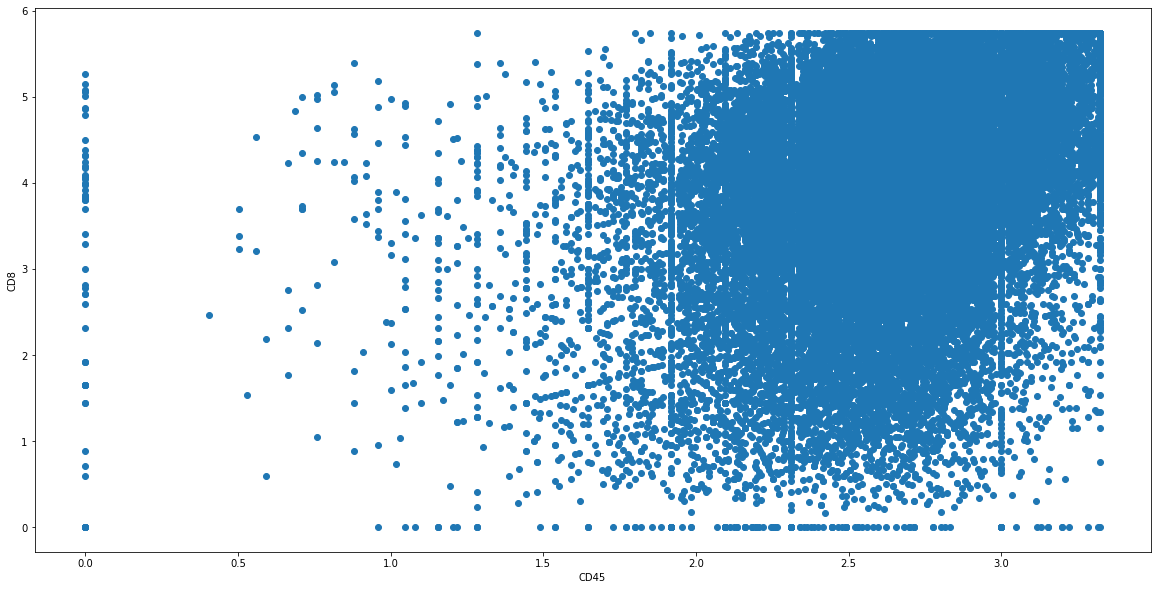

CD45_CD11b -- neg: 0.10391646167944822; pos: 0.15197993536873583


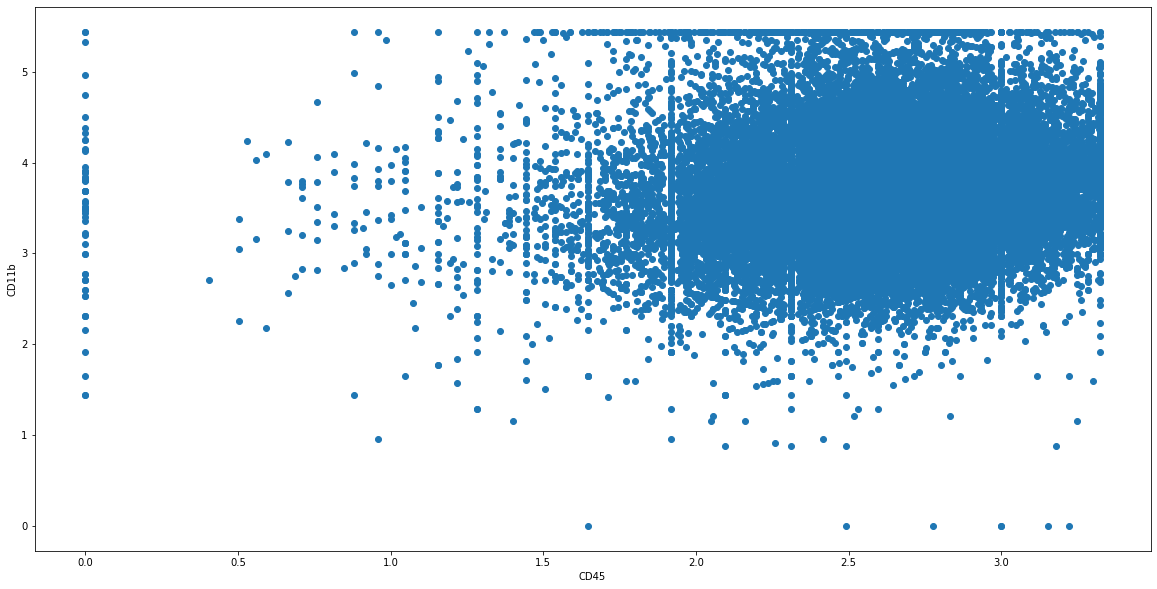

CD45_CD19 -- neg: 0.14257463946365698; pos: 0.10625572758404477


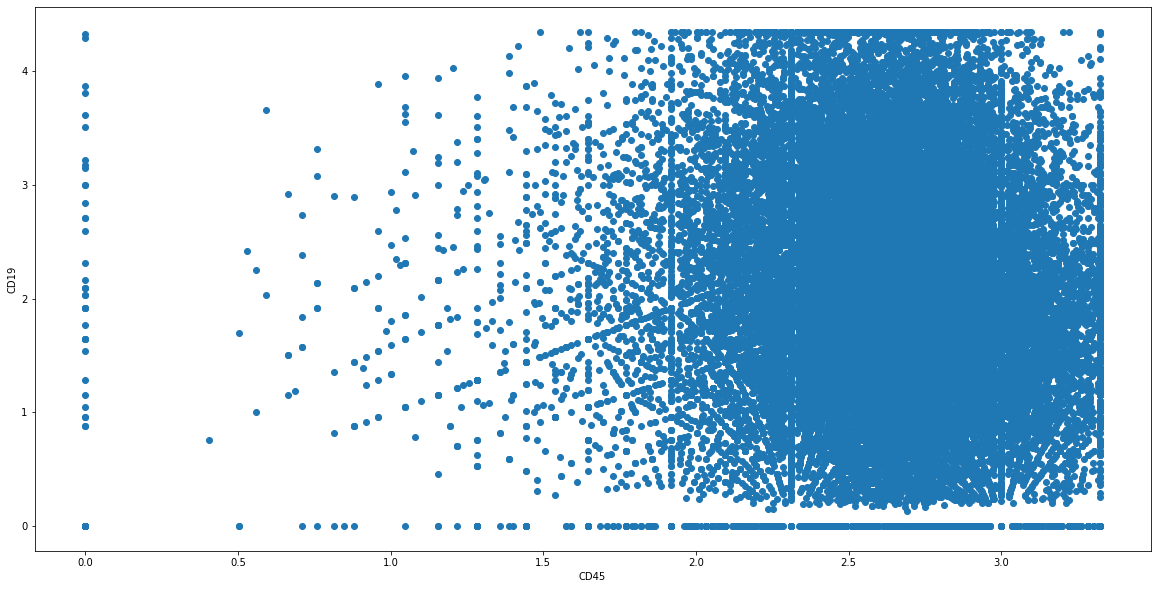

CD45_CD28 -- neg: 0.0719384556021801; pos: 0.1831621087155742


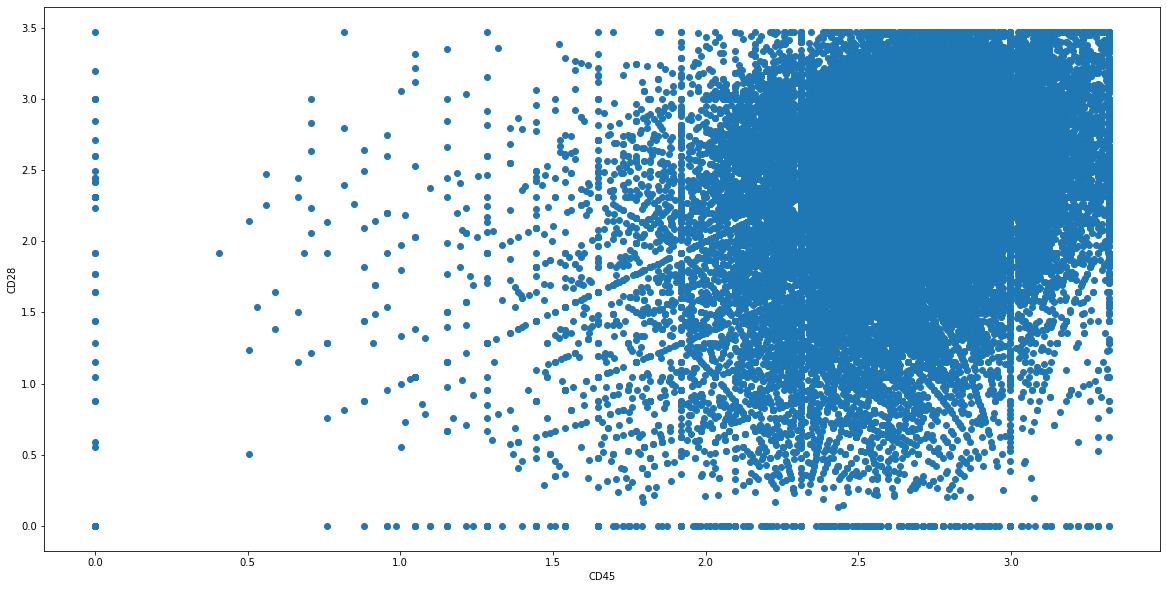

CD45_CD68 -- neg: 0.1319153041045676; pos: 0.1165533207929388


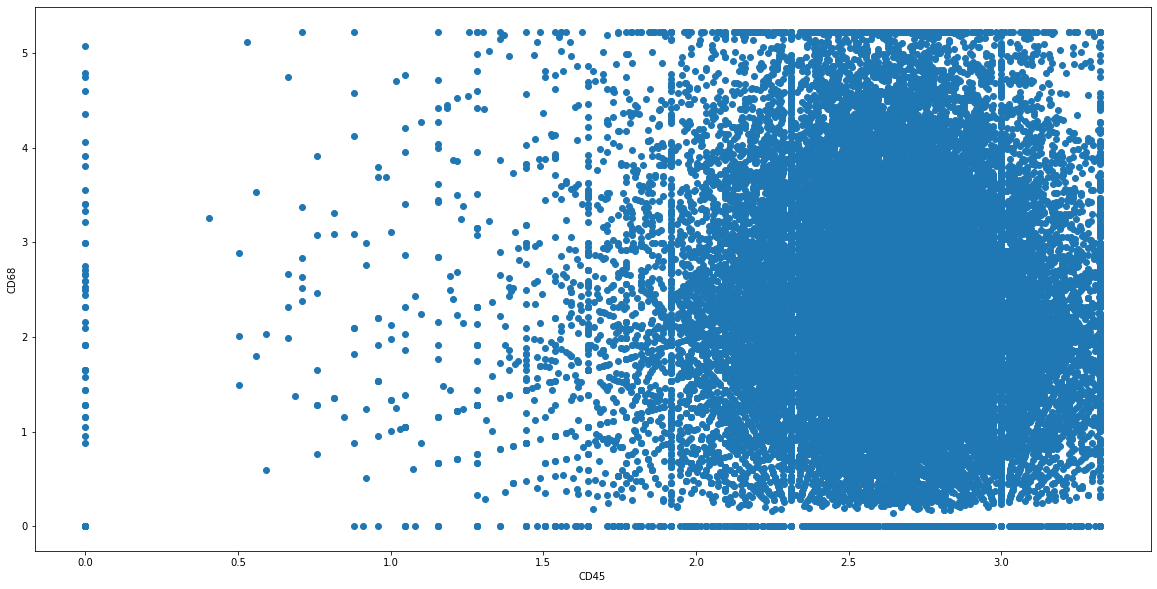

CD4_CD8 -- neg: 0.07312014662615154; pos: 0.16910239714464861


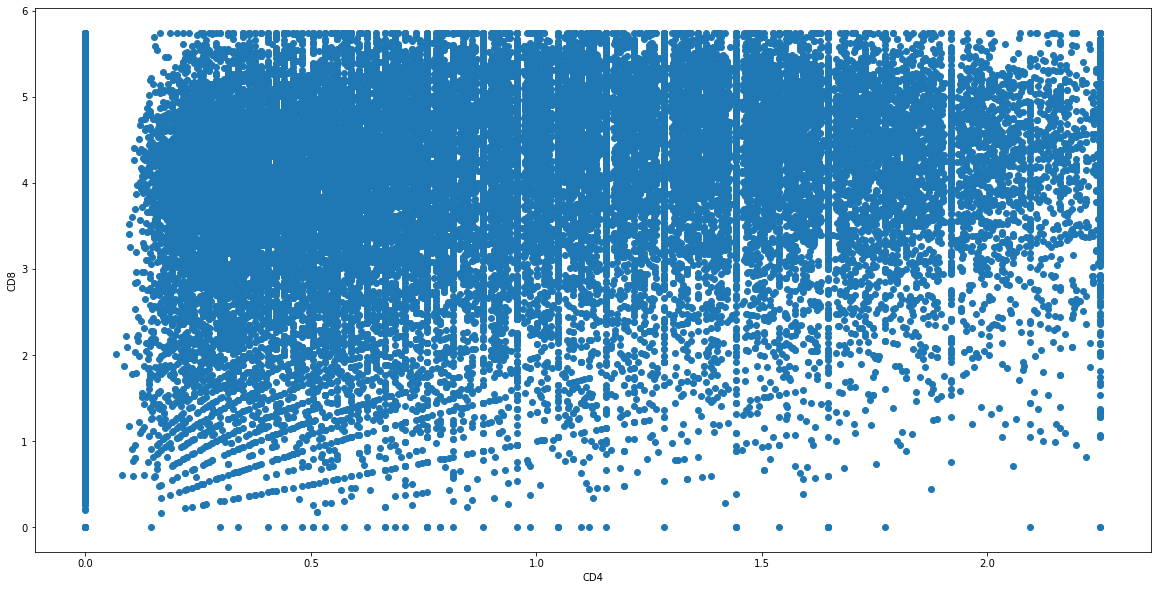

CD4_CD28 -- neg: 0.02160806443833502; pos: 0.2624318718950465


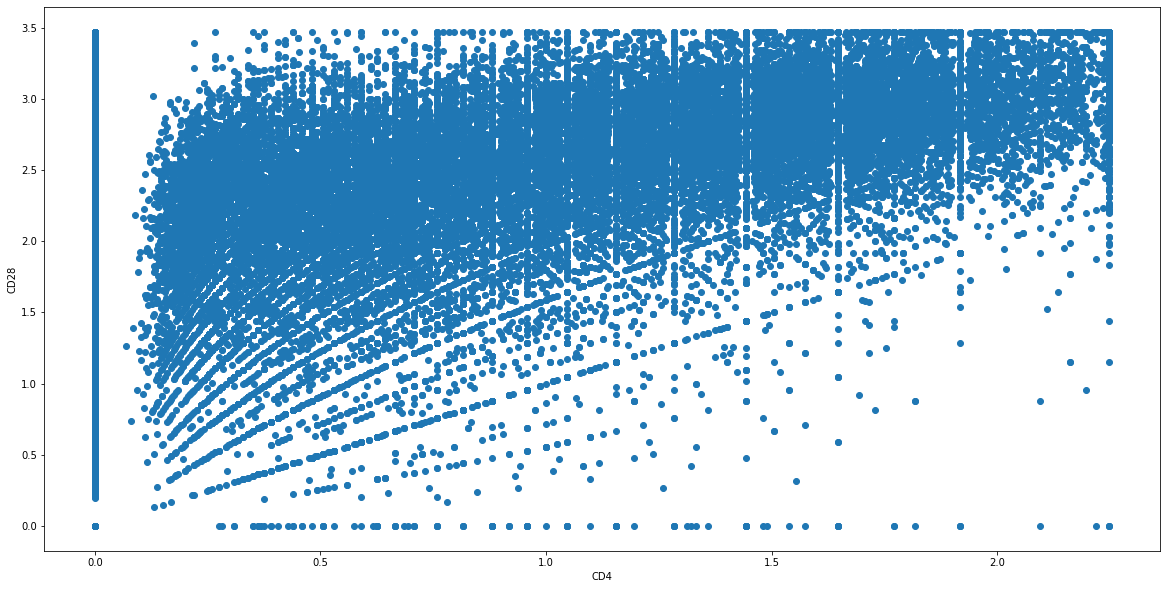

CD8_CD28 -- neg: 0.047436453962282354; pos: 0.22061447933246514


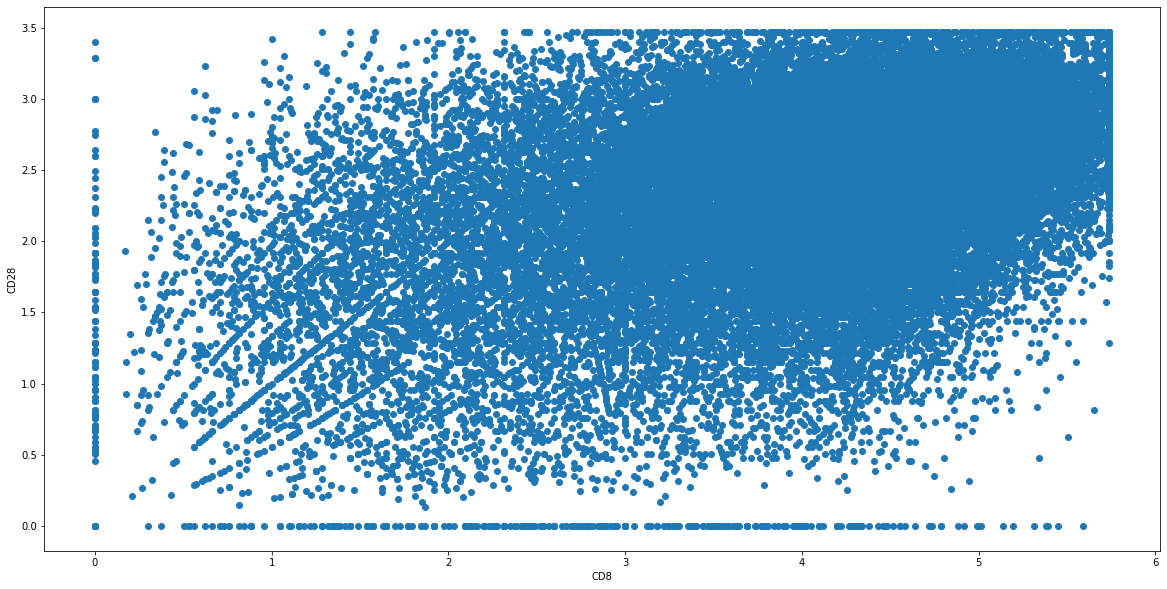

Stroma_CD31 -- neg: 0.10319297737905754; pos: 0.14915834659721217


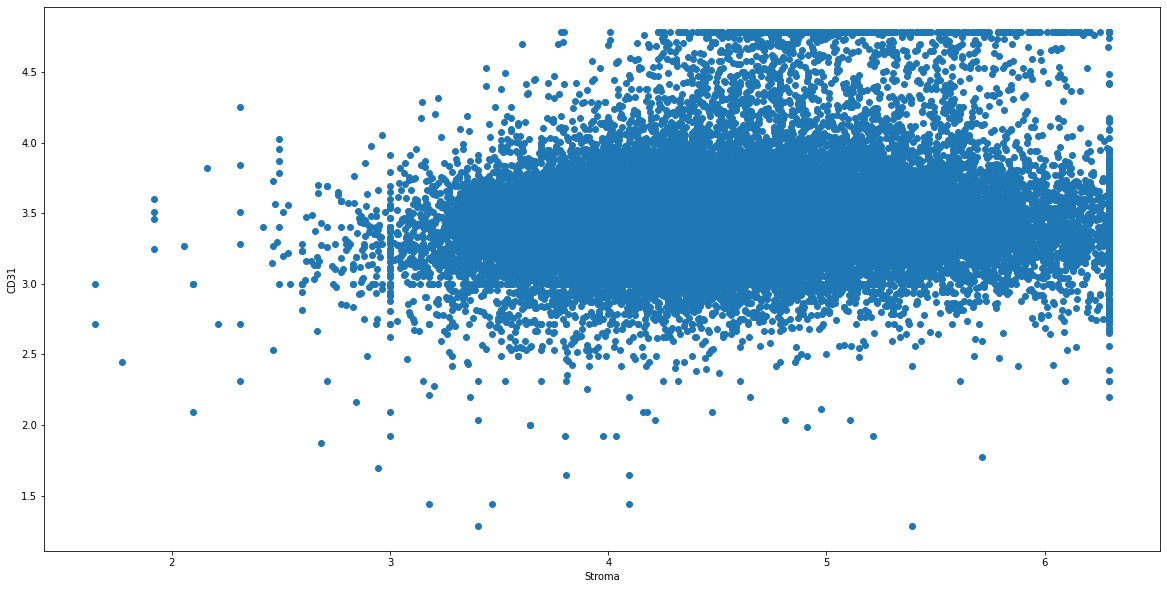

Stroma_Epithelium -- neg: 0.1397048184054406; pos: 0.10857087734529494


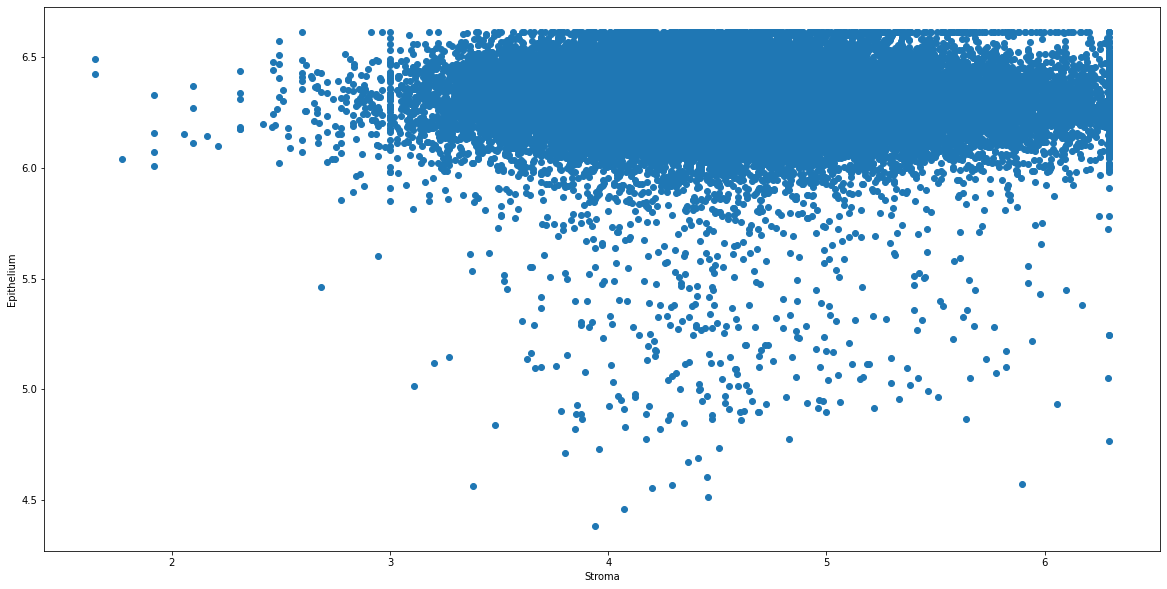

Epithelium_CD4 -- neg: 0.14819370086335792; pos: 0.09670573481888776


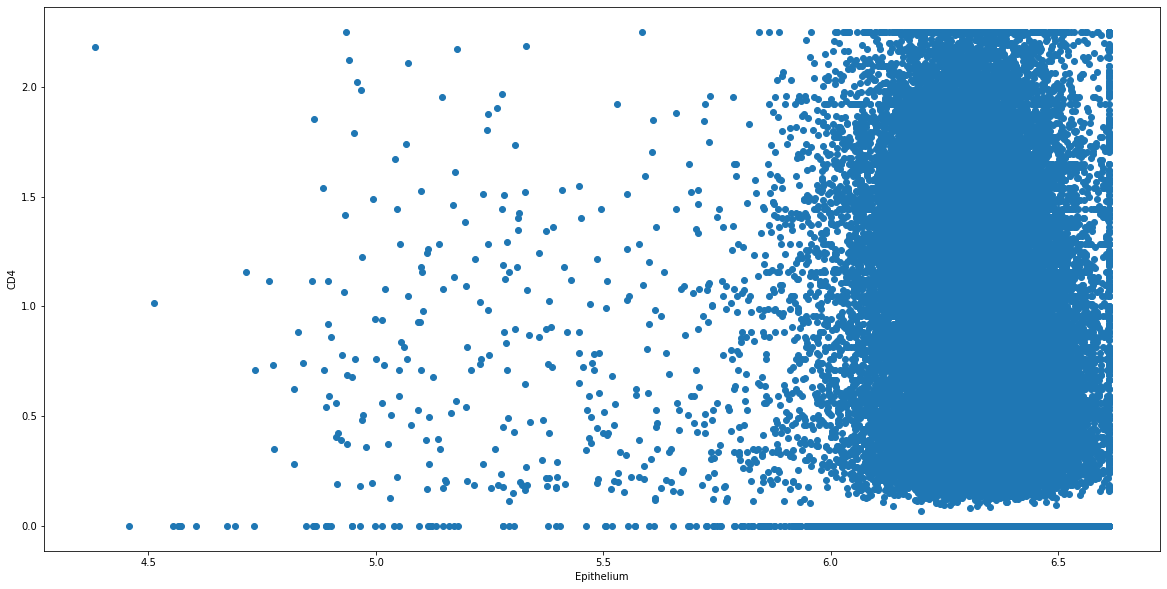

Epithelium_CD8 -- neg: 0.10767858004147976; pos: 0.14527564751844885


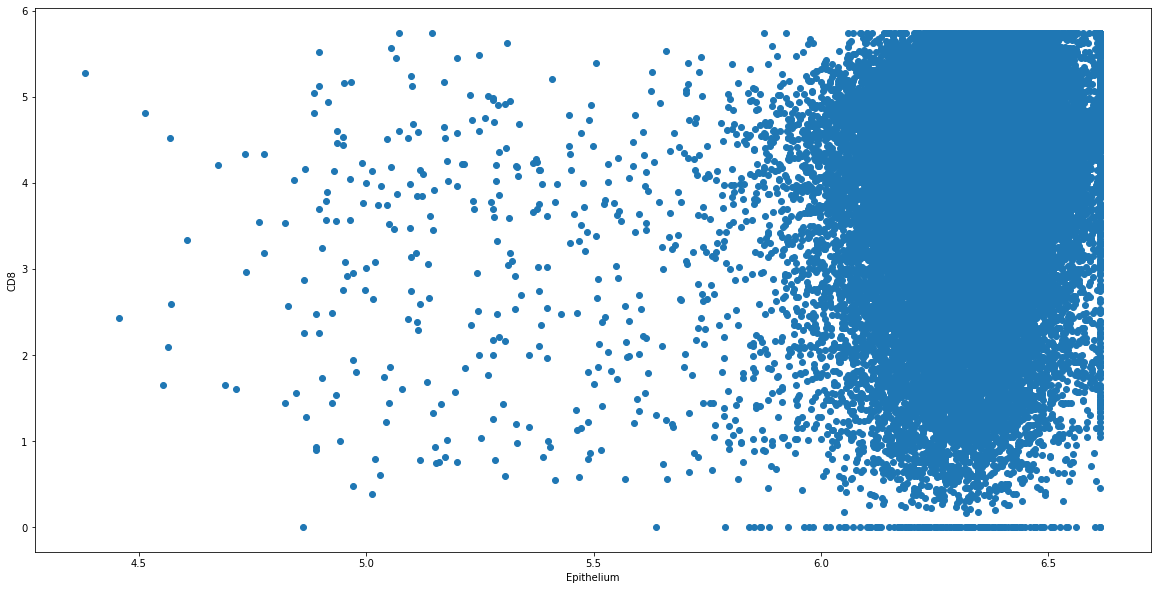

Epithelium_CD11b -- neg: 0.0968504316789659; pos: 0.16261515458447884


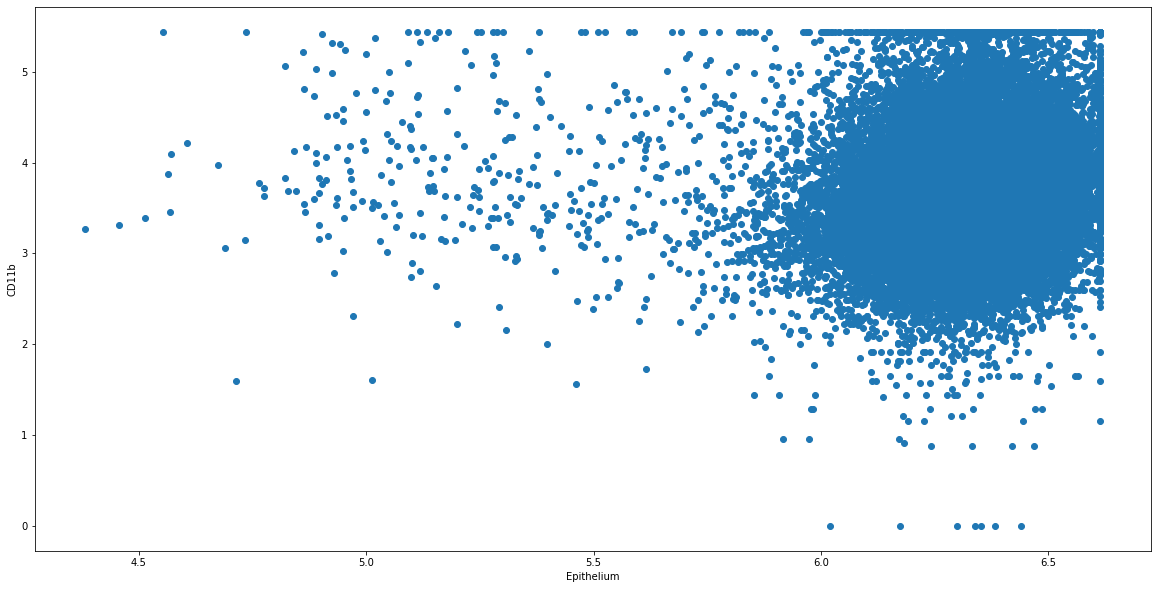

Epithelium_CD31 -- neg: 0.06089326194954903; pos: 0.21374137847875369


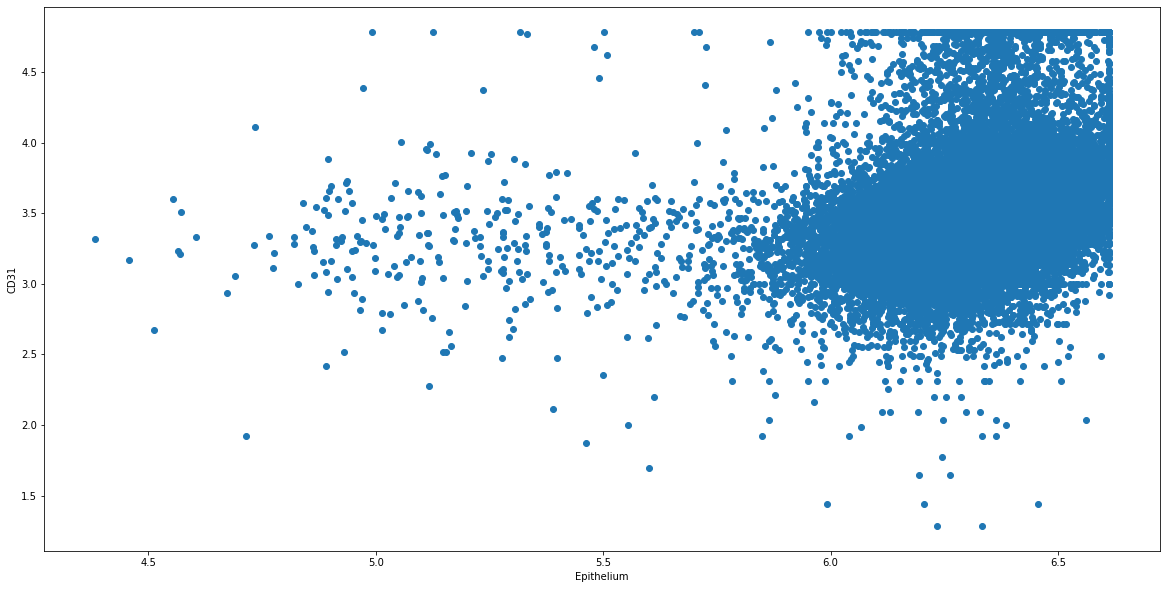

Epithelium_CD19 -- neg: 0.14462451164809723; pos: 0.10789562533159697


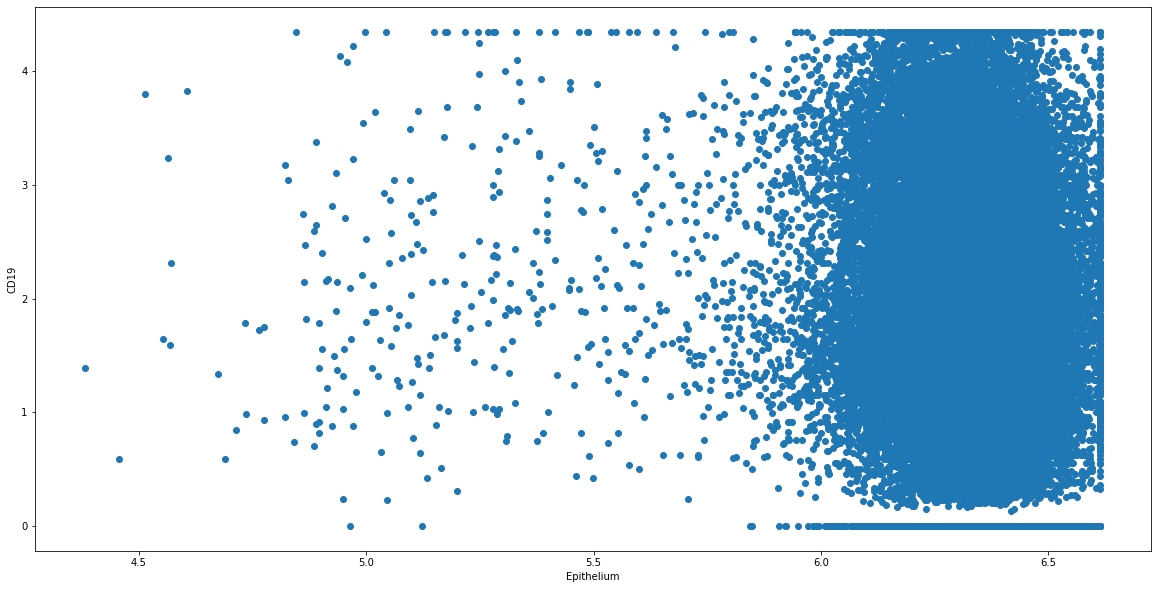

Epithelium_CD45 -- neg: 0.07895625331596971; pos: 0.1809193073843631


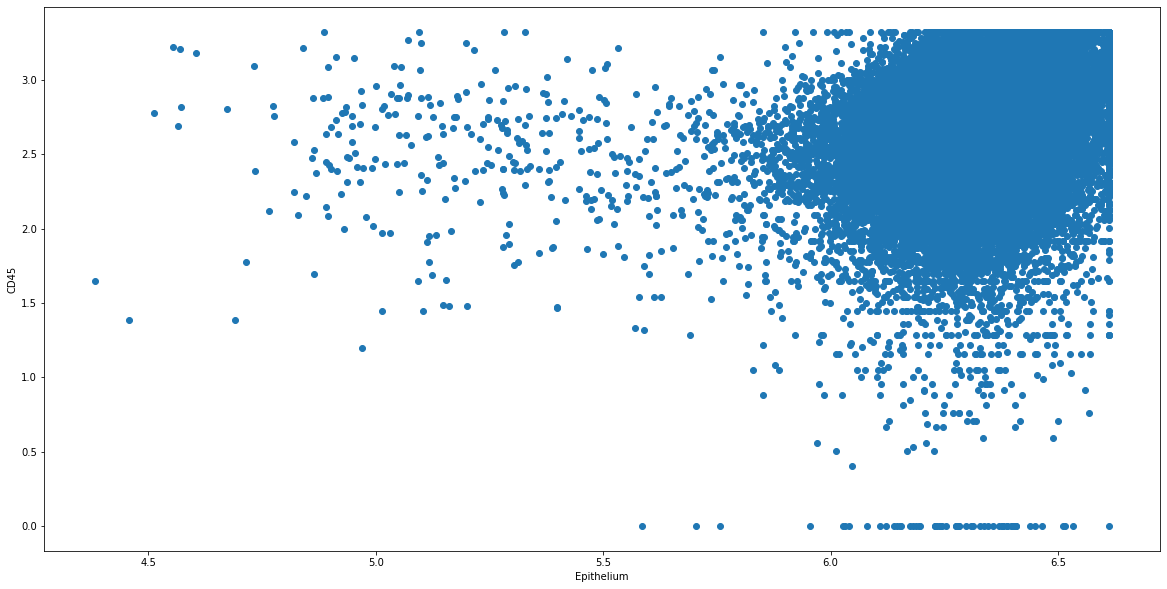

In [15]:
for pair in pairs:
    
    x_name = pair[0]; y_name = pair[1]
    x = np.array(mat[x_name]); y = np.array(mat[y_name])

    ## case 1: bottom right
    bot_right = sum((x > thresholds[x_name][1]) & (y < thresholds[y_name][0]))

    ## case 2: top left
    top_left = sum((x < thresholds[x_name][0]) & (y > thresholds[y_name][1]))

    ## case 3: bottom left
    bot_left = sum((x < thresholds[x_name][0]) & (y < thresholds[y_name][0]))

    ## case 4: top left
    top_right = sum((x > thresholds[x_name][1]) & (y > thresholds[y_name][1]))
    
    ## negative case:
    neg_score = (bot_right + top_left)/len(x)

    ## postive case:
    pos_score = (bot_left + top_right)/len(x)
    
    print("{}_{} -- neg: {}; pos: {}".format(x_name, y_name, neg_score, pos_score))
    
    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()